## 빅데이터 기반 AI 응용 솔루션 개발자 전문과정

### 교과목명 : 선형대수학 및 통계학
- 평가일 : 21.7.30
- 성명 : 김광훈
- 점수 : 97

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
plt.style.use('seaborn-dark')
%config InlineBackend.figure_format = 'retina'
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True

Q1. 평균이 10, 표준편차가 3인 정규분포의 확률밀도함수를 그래프로 표현하세요.  
x축은 np.arange(0,20,0.1) 

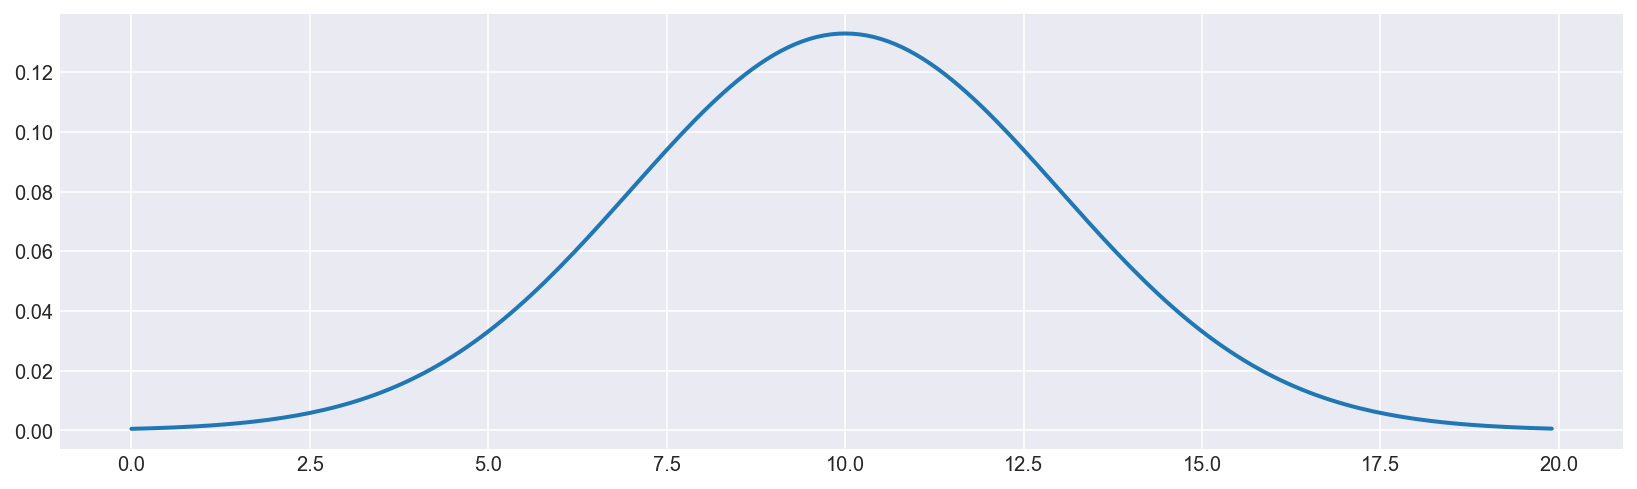

In [2]:
sample_size = np.arange(0,20,0.1)
PDF = stats.norm.pdf(loc=10, scale=3, x=sample_size)
plt.plot(sample_size,PDF)

Q2. 평균이 1, 표준편차가 2인 정규분포의 누적분포함수를 그래프로 표현하세요.  
x축 : np.arange(-3,8,0.1)

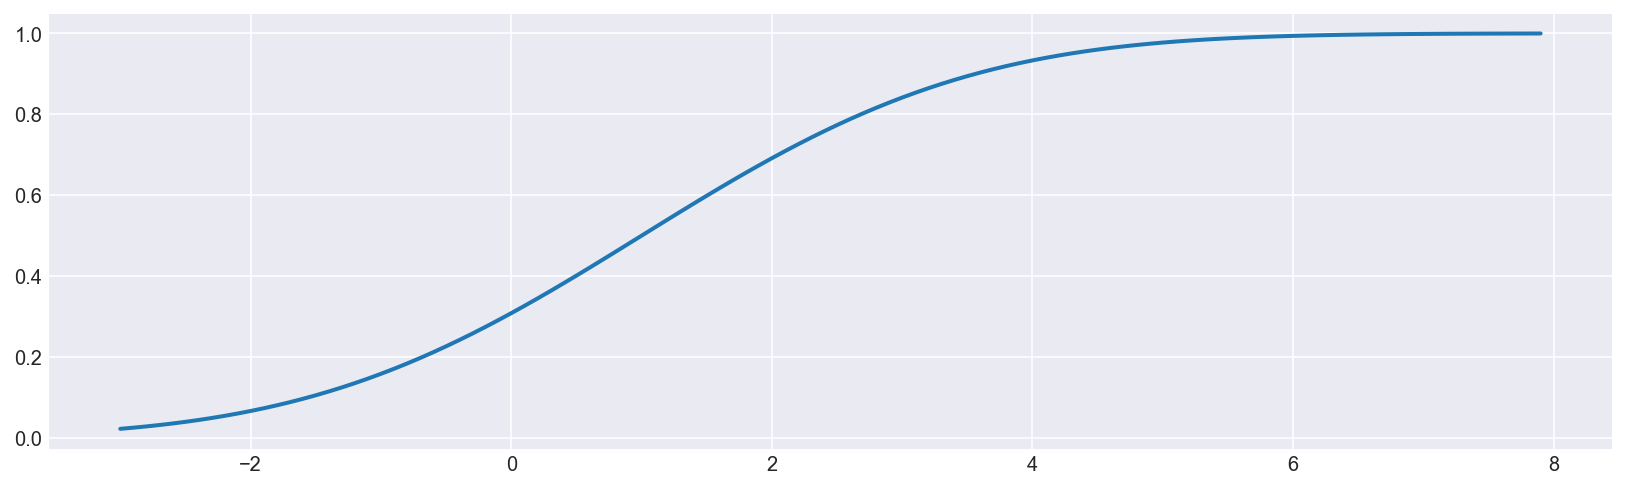

In [3]:
sample_size = np.arange(-3,8,0.1)
CDF = stats.norm.cdf(loc=1 , scale=2, x=sample_size)
plt.plot(sample_size,CDF)

Q3. "dataset/5_2_fm.csv"을 df1으로 불러와서 다음사항을 수행하세요.
- df1을 df2 이름으로 복사한 후 df2의 species의 A, B를 C,D로 변경하세요.
- df의 length를 species가 C인 것은 2배로 d인 것은 3배로 변경하여 df1과 df2를 행방향으로 결합, df 생성 
- df를 species 칼럼을 기준으로 그룹별 평균과 표준편차를 산출

In [4]:
# dataset/5_2_fm.csv를 df1로 불러와서
df1 = pd.read_csv('dataset/5_2_fm.csv')
# df2 이름으로 복사한 후 df2의 species의 A,B를 C,D로 변경하세요
df2 = df1.copy()
df2 = df2.replace({'A':'C','B':'D'})
#df의 length를 species 가 C인 것은 2배로, d인 것은 3배로 변경, df1과 df2를 행방향으로 결합(열로) df생성
C = df2['species'] == 'C'
D = df2['species'] == 'D'
df2_C = df2[C]
df2_D = df2[D]
df2_C['length'] = df2_C['length'] * 2
df2_D['length'] = df2_D['length'] * 3

df2 = pd.merge(df2_C,df2_D,how='outer')

df = pd.merge(df1,df2,how='outer')

grouped = df.groupby('species').agg(['mean','std'])
grouped


<ipython-input-4-1dceb0ea34d5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_C['length'] = df2_C['length'] * 2
<ipython-input-4-1dceb0ea34d5>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_D['length'] = df2_D['length'] * 3


length     
          mean  std
species            
A            3  1.0
B            8  2.0
C            6  2.0
D           24  6.0

Q4. "./dataset/5_2_shoes.csv" 을 데이터프레임으로 불러와서 아래작업을 수행하세요.
- 4행 3열을 복사 후 추가하여 8행 3열로 작성하세요. 
- 피벗테이블을 이용, 교차분석표를 만드세요(values='sales',aggfunc='sum', index= 'store', columns = 'color')

In [5]:
import pandas as pd
shoes = pd.read_csv("./dataset/5_2_shoes.csv")
shoes = shoes.append(shoes)
pivot_T = pd.pivot_table(shoes,values='sales',index='store',columns='color',aggfunc='sum')
pivot_T

color,blue,red
store,,
osaka,26,18
tokyo,20,30


In [6]:
shoes

,store,color,sales
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9


Q5. 주어진 fish 데이터로 다음사항을 수행하세요.
- 모평균의 점추정, 모분산의 점추정
- 자유도, 표준오차
- 신뢰구간 계산 

In [7]:
df = pd.read_csv('dataset/5_7_fl.csv')
fish = df['length']
fish

# 모평균 점추정
m = np.mean(fish)
print('모평균의 점추정 > ', m)
# 모분산의 점추정
sg = np.var(fish,ddof=1)
print('모분산의 점추정 > ', sg)
# 자유도
df = len(fish)-1 
print('자유도 > ', df)
# 표준오차
std = np.std(fish,ddof=1)
se = std/np.sqrt(len(fish))
print('표준오차 > ', se)
#신뢰구간
iv = stats.t.interval(alpha=0.95, df= df, loc = m , scale = se )
print('신뢰구간 > ', iv)

모평균의 점추정 >  4.187039324504523
모분산의 점추정 >  0.6803017080832623
자유도 >  9
표준오차 >  0.26082593967687767
신뢰구간 >  (3.5970100568358245, 4.777068592173221)


Q6. 'dataset/titanic3.csv'을 불러와서 pclass 와 sex 칼럼을 각각 인덱스, 칼럼으로 하고 values는 survived, 함수는 mean을 적용하여 pivot_table을 만든 후 히트맵으로 시각화 및 인사이트를 기술하세요

<AxesSubplot:xlabel='sex', ylabel='pclass'>

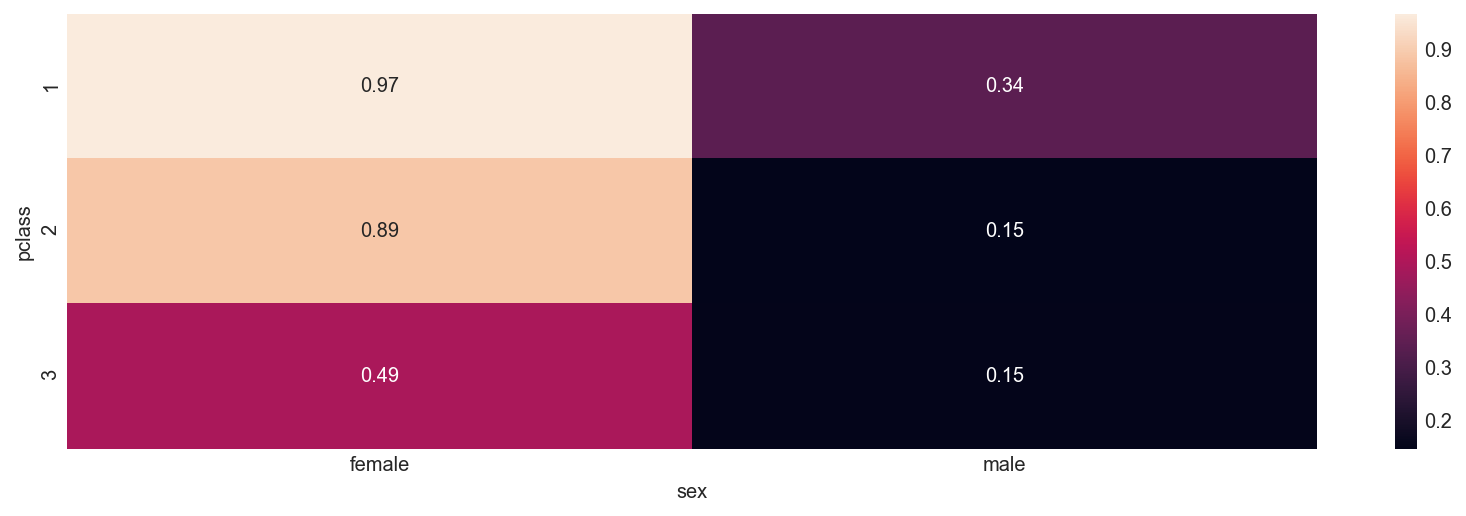

In [8]:
titanic = pd.read_csv('dataset/titanic3.csv')
titanic.head(2)

pivot_T = pd.pivot_table(titanic,index='pclass',columns ='sex',values='survived',aggfunc='mean')

sns.heatmap(pivot_T,annot=True)

# Pclass와 상관없이 여성들이 남성보다 생존확률이 높다.
# 돌일 조건하에 Pclass가 높을 수록 남녀의 생존확률이 상대적으로 높다.

Q7. 4행 5열 배열과 5행 3열 배열을 생성하여 a, b 이름으로 저장 후 a, b의 행렬 곱을 구하세요. (출력 결과는 4행 3열 배열)

In [9]:
a = np.arange(20).reshape(4,5)
b = np.arange(15).reshape(5,3)
dot = a.dot(b)
dot

array([[ 90, 100, 110],
       [240, 275, 310],
       [390, 450, 510],
       [540, 625, 710]])

Q8. Q. fish_multi 데이터프레임으로 다음을 수행하세요.
- A, B 두개의 그룹의 Box Plot을 그리고 이상치를 구하세요.
- 이상치를 제거한 후 Box Plot으로 이상치 여부를 확인하세요.
- 바이올린 플롯을 표현하세요.

   species  length
0        A       2
1        A       3
2        A       3
3        A       4
4        A       4
5        A      10
6        A       4
7        A       5
8        A       5
9        A       6
10       B       2
11       B       6
12       B       6
13       B       7
14       B       7
15       B       7
16       B       7
17       B       8
18       B       8
19       B       9


<AxesSubplot:xlabel='species', ylabel='length'>

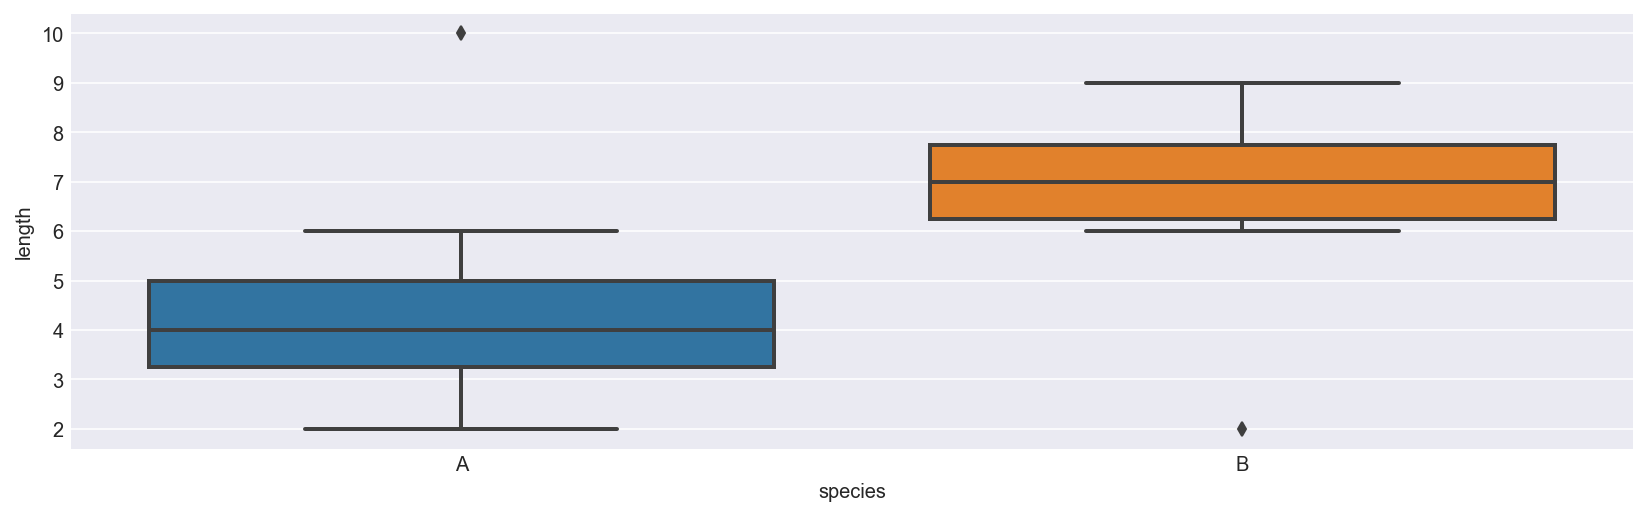

In [10]:
import pandas as pd
fish_multi = pd.read_csv("dataset/4_fm2.csv")
fish_multi.iloc[5,1] = 10
fish_multi.iloc[10,1] = 2
print(fish_multi)
sns.boxplot(data=fish_multi, x = 'species', y = 'length')

In [11]:
test1 = fish_multi.groupby('species')
A =test1.get_group('A')
B =test1.get_group('B')

a_Q1 = A.length.describe()['25%']
a_Q3 = A.length.describe()['75%']
b_Q1 = B.length.describe()['25%']
b_Q3 = B.length.describe()['75%']

a_IQR = a_Q3 - a_Q1
b_IQR = b_Q3 - b_Q1

A_ol=A[(A['length']<(a_Q1 - 1.5*a_IQR)) | (A['length'] > (a_Q3 + 1.5*a_IQR))]
B_ol=B[(B['length']<(b_Q1 - 1.5*b_IQR)) | (B['length'] > (b_Q3 + 1.5*b_IQR))]

fish_multi = fish_multi.drop(A_ol.index)
fish_multi = fish_multi.drop(B_ol.index)
fish_multi.head(1)

,species,length
0,A,2


<AxesSubplot:xlabel='species', ylabel='length'>

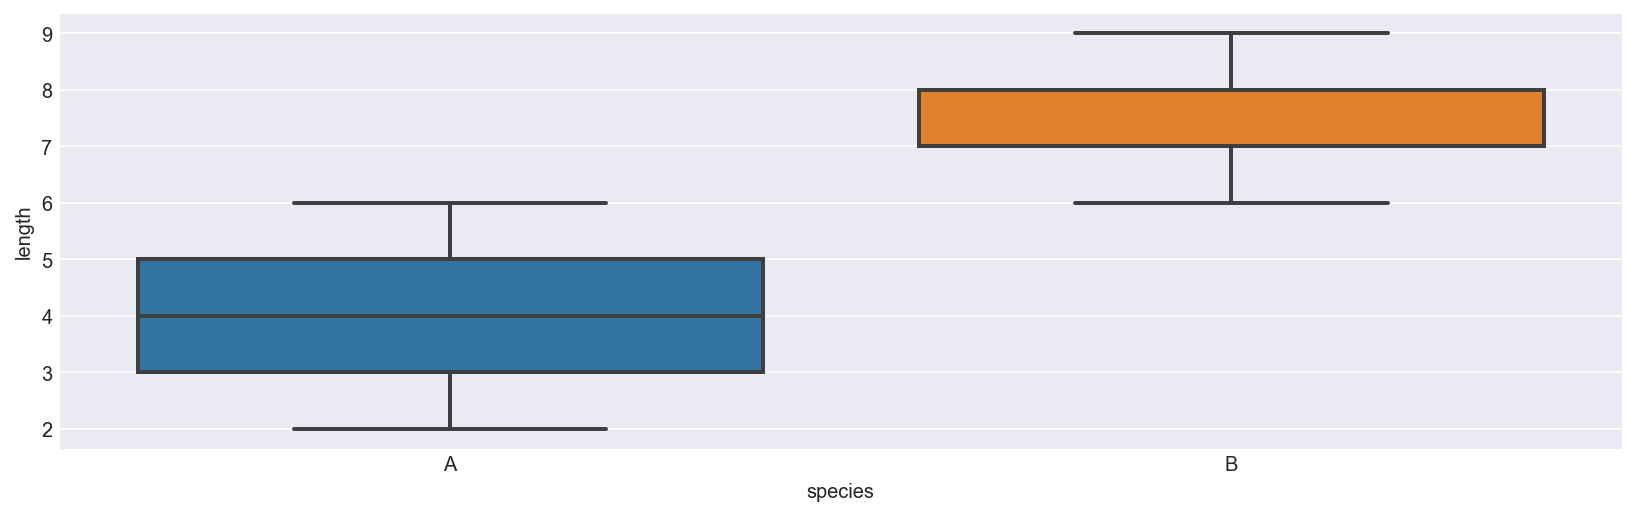

In [12]:
sns.boxplot(data=fish_multi, x = 'species', y = 'length')

<AxesSubplot:xlabel='species', ylabel='length'>

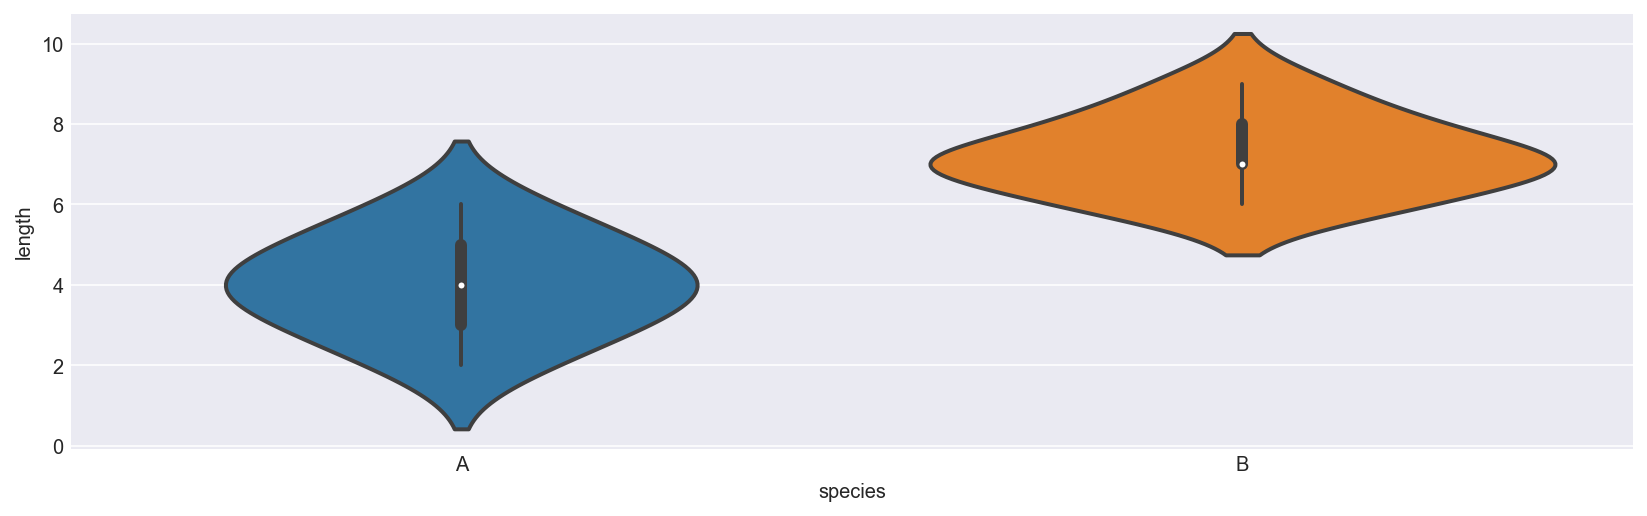

In [13]:
sns.violinplot(data=fish_multi,x='species',y='length')

Q9. df_auto mpg 컬럼과 weight 컬럼에 대하여 산점도, 회귀선, 히스토그램을 
그래프로 같이 표현하여 탐색 후 인사이트를 기술하세요.

In [14]:
import pandas as pd
df_auto = pd.read_excel('dataset/auto-mpg.xlsx')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [1]:
plt.figure(figsize=(10, 5))
fig, ax = plt.subplots(ncols=2)
df_auto['mpg'].plot(kind='hist',ax=ax[0])
df_auto['weight'].plot(kind='hist',ax=ax[1],color='green')
sns.lmplot(data=df_auto,x='weight',y='mpg')

#jointplot - 사용안함. 
# 11:50 업로드본 < 파일을 잘못확인함.
# 따라 jointplot사용안한 점으로 부분.


NameError: name 'plt' is not defined

In [16]:
# 무게가 높을 수록 연비는 줄어든다. (반비레관게)

Q10. 샘플사이즈가 크면 불편분산은 모분산에 가까워진다는 것을 그래프로 증명하세요. 단, 모분산은 아래 모집단으로 부터 도출된다.

In [17]:
population = stats.norm(loc = 4, scale = 0.8)
sample_size = np.arange(20,10000,10 )
sample_var = np.zeros(len(sample_size))

for i in range(len(sample_size)):
    sample_rvs = population.rvs(size=sample_size[i])
    var = np.var(sample_rvs,ddof=1)
    sample_var[i] = var
    
sample_size1 = np.arange(100,10000,10)
sample_var1 = np.zeros(len(sample_size1))

for i in range(len(sample_size1)):
    sample_rvs1 = population.rvs(size=sample_size1[i])
    var = np.var(sample_rvs1,ddof=1)
    sample_var1[i] = var
    

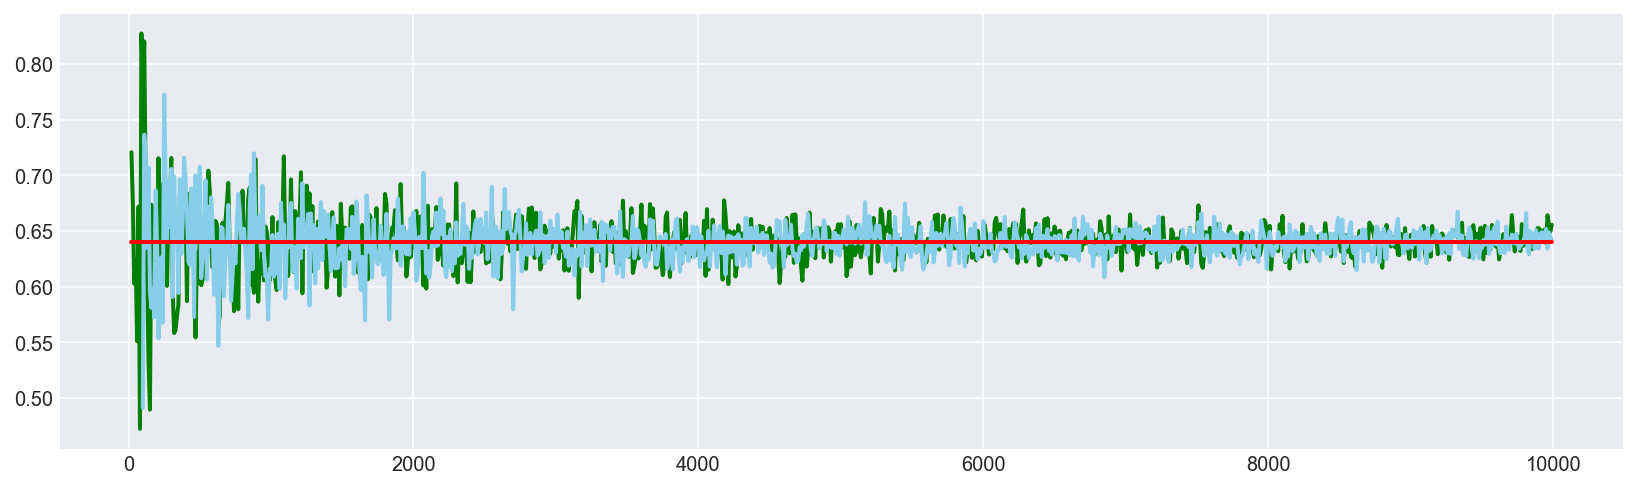

In [18]:
plt.plot(sample_size,sample_var,color='g')
plt.plot(sample_size1,sample_var1,color='skyblue')
mvar = [0.64 for x in range(998)]
plt.plot(sample_size,mvar,color='r')